In [1]:
import random
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image
from tqdm import tqdm

# Creating distance array


<img src="./tsp-nodes.jpg"/>

We Create a markup table with all distances. <br/>
Since We have only bottom part
<img src="./unknown.png"/>
We need to add a mirror copy like above

In [202]:
import sys

fileName = 'a280'
folder = 'data/'

In [203]:

f = open(folder+fileName + '.txt','r')
string = ""
arrayTSP = []
index = int(f.readline())
for i in range(index):
    line = f.readline()
    row = line.split(' ')[:-1]
    arrayTSP.append(row)
    
    for ii, val in enumerate(row):
        if(val is not '0'):
            arrayTSP[ii].append(val)

    string += line

print(len(arrayTSP))
f.close()

280


# Creating City Array

In [62]:
class City:
    def __init__(self, index, x, y):
        self.x = float(x)
        self.y = float(y)
        self.index = int(index)-1
    


In [205]:
string = ""
citiesPop = []
with open(folder+fileName + '.tsp', 'r') as f:
    lines = f.readlines()[6:-1]
    for i in range(index):
        if(i < len(lines)):
            line = lines[i]
            strippedArr = line.strip().split(' ')
            row =  [x for x in strippedArr if x]
            if(len(row) > 1):
                citiesPop.append(City(float(row[0]), float(row[1]), row[2].replace('\n','')))

f.close()

In [206]:
def calculateDistance(population, cities):
    distance = 0
    for i, val in enumerate(population):
        if(i != len(population)-1):
            currentCityIndex = population[i].index
            nextCityIndex = population[i+1].index
            distance += float(cities[currentCityIndex][nextCityIndex])
    return distance

print(calculateDistance(citiesPop, arrayTSP))

2806.0


In [136]:

# Generate population
class OrderOfPopulation():
    sum = 0
    def __init__(self, population, cities):
        self.cities = cities
        self.population = population
        distance = self.calculateDistance(population)
        self.distance = distance
        self.fitness = self.calculateFitness(distance)
        
    def calculateFitness(self, distance):
        #our score is distance which less means better thats why we divide it
        return 1/distance
    
    def calculateDistance(self, population):
        distance = 0
        for i, val in enumerate(population):
            if(i != len(population)-1):
                currentCityIndex = population[i].index
                nextCityIndex = population[i+1].index
                try:
                    distance += float(self.cities[currentCityIndex][nextCityIndex])
                except IndexError:
                    print(population[i].index, population[i+1].index, len(self.cities[currentCityIndex]), self.cities[currentCityIndex])
#                 if(len(self.cities) < currentCityIndex and len(self.cities[currentCityIndex]) < nextCityIndex):
#                     distance += float(self.cities[currentCityIndex][nextCityIndex])
        
        return distance
    
    def setProb(self, sum):
        self.prob = self.fitness / sum

    def setDistance(self, distance):
        self.distance = distance
    


# Creating 1st population

In [207]:
def getPopulation(cities, iteration):
    population = []
    for i in range(iteration):
        np.random.shuffle(cities)
        p = OrderOfPopulation(cities, arrayTSP)
        
        population.append(p)
    return population;

# we set how many random city configuration will be in the population
numberOfPopulation = 5
cityPopulation = getPopulation(citiesPop, numberOfPopulation)
# set probability (normalize fitness score)
# so we have values in between 0-1 
sum = 0
for i, val in enumerate(cityPopulation):
    sum = sum + val.fitness
print(sum)

sumProb = 0
for i, val in enumerate(cityPopulation):
    val.setProb(sum)
    sumProb = sumProb + val.prob
    
print(sumProb)

0.000148045710876032
1.0


# Finding the best Individual in the population after 1st population

In [208]:
bestPopulation = None
bestDistance = 0

def getBestFitnessScore(population):
    global bestDistance
    global bestPopulation

    for i, val in enumerate(population):
        if(bestPopulation == None or bestDistance > population[i].distance):
            bestDistance = population[i].distance
            bestPopulation = population[i]
    
    return bestPopulation
    

bestPopulation = getBestFitnessScore(cityPopulation)

print(bestPopulation.distance)

33217.0


In [10]:
# picks number randomly  but with different probability for each element
def pickOne(list, prob):
    index = 0
    r = random.uniform(0, 1)
    while(r > 0.99):
        r = r - prob
        index+=1
    index-=1
    return list[index]

In [11]:
def swap(list, indexA, indexB):
    tempA = list[indexA]
    list[indexA] = list[indexB]
    list[indexB] = tempA

In [157]:
mutationRate = 0.015
def mutate(order):
    indexA = math.floor(np.random.uniform(0, len(order)))
    indexB = math.floor(np.random.uniform(0, len(order)))
    if(np.random.uniform(0,1) < mutationRate):
        swap(order, indexA, indexB)

arr = [1,2,3,4,5,6,7,8,9,10]
arr2 = [8,2,10,4,5,9,7,3,6,1]
mutate(arr)
print(arr)
# print(crossover(arr, arr2))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


# Crossover

##### Typical crossover looks like this
We take half of <b>parentA</b> and 2nd half of <b>parentB</b>, and We combine them

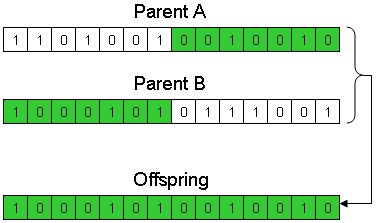

In [13]:
Image(filename='crossover2.jpg')

 Our crossover takes half of <b>parentA</b> and fills rest of the offspring with <b>parentB</b> that didn't occured in array. <br>
 We do it because every element is unique so We can't have duplicates


In [14]:
from random import shuffle
def crossover(orderA, orderB):
    indexOfHalf = math.floor(len(orderA)/2)
    partOfA = orderA[0:indexOfHalf]
    partOfB = []
    for i in orderB:
        if i not in partOfA:
            partOfB.append(i)
#     x = [[i] for i in range(10)]
#     shuffle(partOfA)
    return partOfA + partOfB

In [182]:
def getFittest(population):
    # sorts the list based on the routes' lengths
    sorted_list = sorted(population, key=lambda x: x.fitness, reverse=True)
    return sorted_list[:2]

In [209]:
def newGeneration(orders):
    global arrayTSP
    global sum
    newOrders = []
    for i, citiesOrder in enumerate(orders):
#         orderA = pickOne(orders, citiesOrder.prob)
#         orderB = pickOne(orders, citiesOrder.prob)
        
        orderA = random.choice(orders)
        orderB = random.choice(orders)
#         bestFit = getFittest(orders)
#         orderA = bestFit[0]
#         orderB = bestFit[1]

        mixedOrder = crossover(orderA.population, orderB.population)
    
        mutate(mixedOrder)
        mutate(mixedOrder)
        p = OrderOfPopulation(mixedOrder, arrayTSP)
        p.setProb(sum)
        newOrders.append(p)
    return newOrders

# Create new generation 

In [213]:
numberOfGenerations = 10000
length = len(arrayTSP)
if(length < 500):
    numberOfGenerations = 80000
if(length < 100):
    numberOfGenerations = 500000
#20 3000000
scoreTest = 99999999999
for i in tqdm(range(numberOfGenerations)):
    cityPopulation = newGeneration(cityPopulation)
    bestPopulation = getBestFitnessScore(cityPopulation)
    cityPopulation = cityPopulation[1:]
    cityPopulation.insert(0, bestPopulation)
    if(scoreTest > bestPopulation.distance):
        scoreTest = bestPopulation.distance
        print(scoreTest)
    




  0%|          | 0/80000 [00:00<?, ?it/s]

18155.0




  0%|          | 27/80000 [00:00<05:00, 266.50it/s]

18140.0




  0%|          | 52/80000 [00:00<05:08, 259.44it/s]

  0%|          | 77/80000 [00:00<05:14, 254.34it/s]

18034.0
18026.0
17994.0




  0%|          | 99/80000 [00:00<05:29, 242.46it/s]

  0%|          | 127/80000 [00:00<05:17, 251.40it/s]

  0%|          | 155/80000 [00:00<05:09, 258.09it/s]

  0%|          | 183/80000 [00:00<05:03, 262.59it/s]

  0%|          | 209/80000 [00:00<05:05, 261.44it/s]

  0%|          | 237/80000 [00:00<04:59, 266.13it/s]

17931.0




  0%|          | 264/80000 [00:01<04:58, 266.70it/s]

  0%|          | 290/80000 [00:01<05:01, 264.44it/s]

  0%|          | 316/80000 [00:01<05:04, 261.80it/s]

  0%|          | 344/80000 [00:01<04:58, 266.75it/s]

  0%|          | 372/80000 [00:01<04:54, 270.32it/s]

  1%|          | 401/80000 [00:01<04:50, 274.19it/s]

17906.0




  1%|          | 429/80000 [00:01<04:54, 270.06it/s]

17873.0




  1%|          | 456/80000 [00:01<05:00, 265.06it/s]

  1%|          | 484/80000 [00:01<04:57, 267.25it/s]

  1%|          | 511/80000 [00:01<04:58, 266.19it/s]

17835.0




  1%|          | 538/80000 [00:02<04:59, 265.53it/s]

  1%|          | 565/80000 [00:02<04:59, 265.49it/s]

17794.0




  1%|          | 592/80000 [00:02<05:04, 260.41it/s]

  1%|          | 619/80000 [00:02<05:04, 260.71it/s]

  1%|          | 648/80000 [00:02<04:57, 266.75it/s]

  1%|          | 677/80000 [00:02<04:51, 271.94it/s]

170 279 279 ['242', '233', '219', '211', '220', '212', '212', '206', '201', '201', '195', '190', '185', '180', '179', '161', '151', '146', '142', '138', '134', '159', '167', '171', '163', '156', '153', '151', '141', '130', '138', '146', '140', '132', '133', '141', '146', '138', '130', '122', '115', '107', '99', '104', '111', '119', '126', '134', '142', '149', '152', '144', '137', '129', '122', '115', '107', '100', '97', '91', '84', '81', '84', '87', '80', '85', '96', '106', '111', '102', '96', '91', '87', '82', '79', '72', '76', '74', '59', '51', '54', '58', '62', '68', '74', '70', '62', '55', '48', '40', '37', '36', '48', '56', '64', '64', '57', '49', '39', '29', '25', '24', '25', '29', '23', '18', '25', '34', '41', '40', '47', '50', '58', '54', '61', '66', '68', '76', '76', '84', '91', '99', '107', '115', '122', '125', '128', '131', '123', '127', '131', '135', '140', '136', '130', '125', '119', '114', '110', '117', '113', '109', '106', '104', '96', '99', '102', '106', '101', '91', '7



  1%|          | 705/80000 [00:02<05:11, 254.28it/s]

  1%|          | 731/80000 [00:02<05:11, 254.21it/s]

  1%|          | 759/80000 [00:02<05:05, 259.72it/s]

  1%|          | 788/80000 [00:02<04:56, 266.78it/s]



KeyboardInterrupt: 

# Finding the best Individual in the population after creating new Generation

In [178]:
bestPopulation = getBestFitnessScore(cityPopulation)
print('Best distance - ', bestPopulation.distance)

8973.0


# Visualizing best path

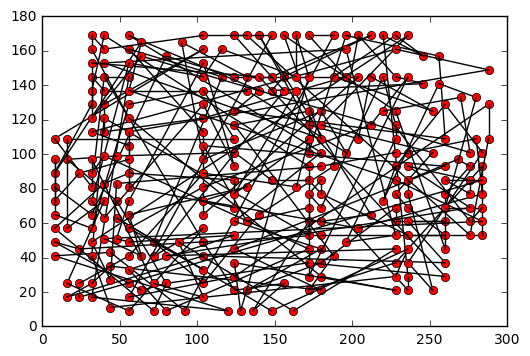

Saved to wynik_a280


In [214]:
import matplotlib.pyplot as plt

# display all cities
def displayBestPopulation():
    order = []
    for i, city in enumerate(bestPopulation.population):
        plt.plot(city.x, city.y, 'ro-')
        if (i+1) <= (len(bestPopulation.population)-1):
            nextCity = bestPopulation.population[i+1];
            order.append(city.index)
            plt.plot([city.x, nextCity.x],[city.y,nextCity.y],'k-')

    plt.show()
    order = np.array(order)
    np.savetxt("wynik_"+ fileName +".txt", order, fmt="%d")
    print('Saved to wynik_'+fileName)

displayBestPopulation()